<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/M_acepta_y_rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de aceptación y rechazo**

El método de aceptación y rechazo es una técnica para generar muestras de una distribución de probabilidad específica cuando no es fácil hacerlo directamente. Este método se basa en la generación de puntos aleatorios y la aceptación o rechazo de estos puntos según una condición específica.


**Descripción del Método**

Sea $f(x)$ la función de densidad de probabilidad (PDF) de la distribución objetivo de la cual queremos generar muestras. Supongamos que podemos encontrar una constante $c > 0$ y una función de densidad de probabilidad $g(x)$ tal que:


$$f(x) \leq c g(x) \quad \text{para todo } x.$$


El método de aceptación y rechazo sigue los siguientes pasos:


1.Generar un valor $y$ de la distribución $g(x)$.

2.Generar un valor uniforme $u$ en el intervalo $[0, 1]$.

3.Aceptar $y$ si $u\frac{f(y)}{c g(y)}$. Si no, rechazar $y$ y volver al paso 1.


Análisis del Método

Para el análisis, consideremos una función de densidad de probabilidad objetivo:

$$
f(x) = 20 x (1 - x)^3, \quad 0 \leq x \leq 1.
$$

El objetivo es generar muestras de esta distribución usando el método de aceptación y rechazo.

Primero, seleccionamos una función de densidad de probabilidad $g(x)$ que sea fácil de muestrear y una constante $c$ tal que:

$$
f(x) \leq c g(x) \quad \text{para todo } x.
$$

En este caso, podemos usar una distribución uniforme $g(x) = 1$ en el intervalo $[0, 1]$ y la constante:

$$
c = \max_{0 \leq x \leq 1} \frac{f(x)}{g(x)} = \max_{0 \leq x \leq 1} f(x) = \frac{135}{64}.
$$

Conclusión

El método de aceptación y rechazo es una técnica eficaz para generar muestras de una distribución de probabilidad compleja utilizando una distribución más simple. Este método es particularmente útil cuando la función de densidad de probabilidad objetivo es complicada o no tiene una forma inversa cerrada.

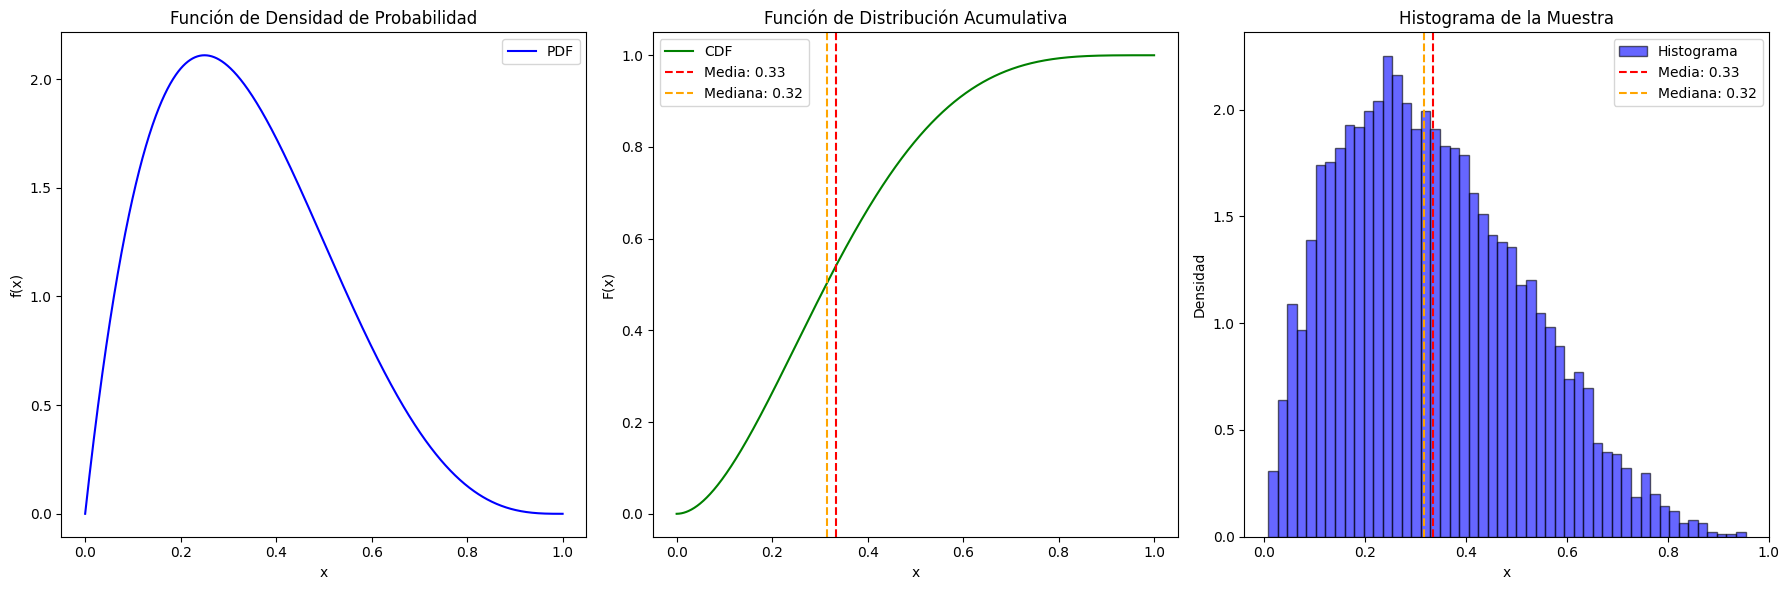

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de densidad de probabilidad (PDF)
def f(x):
    return 20 * x * (1 - x) ** 3

# Generar la muestra usando el método de aceptación y rechazo
def aceptandrecha(n):
    l1 = []
    x_adentro = []
    y_dentro = []
    x_fuera = []
    y_fuera = []
    ctte = 135 / 64
    for i in range(n):
        y = np.random.uniform()
        u = np.random.uniform()
        if u < f(y) / ctte:
            l1.append(y)
            x_adentro.append(y)
            y_dentro.append(u)
        else:
            x_fuera.append(y)
            y_fuera.append(u)
    return l1, x_adentro, y_dentro, x_fuera, y_fuera

# Calcular la CDF a partir de la PDF
def compute_cdf(pdf, x_values):
    cdf = np.cumsum(pdf)
    cdf = cdf / cdf[-1]  # Normalizar para que la última entrada sea 1
    return cdf

# Generar la muestra
n = 10000
S, x_1, y_1, x_2, y_2 = aceptandrecha(n)

# Calcular la PDF y CDF en una malla de puntos
x_values = np.linspace(0, 1, 1000)
pdf_values = f(x_values)
cdf_values = compute_cdf(pdf_values, x_values)

# Calcular media y mediana de la muestra
mean_sample = np.mean(S)
median_sample = np.median(S)

# Graficar la PDF
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(x_values, pdf_values, label="PDF", color="blue")
plt.title("Función de Densidad de Probabilidad")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Graficar la CDF y añadir las líneas de media y mediana
plt.subplot(1, 3, 2)
plt.plot(x_values, cdf_values, label="CDF", color="green")
plt.axvline(mean_sample, color='red', linestyle='--', label=f'Media: {mean_sample:.2f}')
plt.axvline(median_sample, color='orange', linestyle='--', label=f'Mediana: {median_sample:.2f}')
plt.title("Función de Distribución Acumulativa")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()

# Graficar el histograma de la muestra y añadir las líneas de media y mediana
plt.subplot(1, 3, 3)
plt.hist(S, bins=50, color="blue", edgecolor='black', density=True, alpha=0.6, label="Histograma")
plt.axvline(mean_sample, color='red', linestyle='--', label=f'Media: {mean_sample:.2f}')
plt.axvline(median_sample, color='orange', linestyle='--', label=f'Mediana: {median_sample:.2f}')
plt.title("Histograma de la Muestra")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()
